In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from joblib import dump, load

In [3]:
# 폰트지정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 부호 깨짐 지정
plt.rcParams['axes.unicode_minus'] = False

# 숫자가 지수표현식으로 나올 때 지정
pd.options.display.float_format = '{:.2f}'.format

In [4]:
# 1. 데이터 로드 및 캐싱
@st.cache_data
def load_data():
    df = pd.read_csv('dataset/mental_health_wearable_data.csv', encoding='utf-8')
    df = df.rename(columns={'Mental_Health_Condition ': 'Mental_Health_Condition'})
    return df


df = load_data()
df.columns = df.columns.str.strip()
print(df.columns)

2025-03-19 18:48:21.704 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-03-19 18:48:21.706 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-03-19 18:48:21.707 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-19 18:48:22.302 
  command:

    streamlit run c:\ai_files\ai_Study\aiproject\regression\.venv\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-03-19 18:48:22.303 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-19 18:48:22.304 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-19 18:48:22.318 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-19 18:48:22.320 Thre

Index(['Heart_Rate_BPM', 'Sleep_Duration_Hours', 'Physical_Activity_Steps',
       'Mood_Rating', 'Mental_Health_Condition'],
      dtype='object')


In [5]:
df.head()

,Heart_Rate_BPM,Sleep_Duration_Hours,Physical_Activity_Steps,Mood_Rating,Mental_Health_Condition
0,98,7.43,13760,5,1
1,111,9.46,11455,9,0
2,88,4.04,9174,8,1
3,74,8.86,12612,1,1
4,102,9.69,3923,9,0


In [6]:
    
# 2. 특성 선택
selected_features = ['Heart_Rate_BPM', 'Sleep_Duration_Hours', 'Physical_Activity_Steps', 'Mood_Rating']
X = df[selected_features]
y = df['Mental_Health_Condition']
print(selected_features)

['Heart_Rate_BPM', 'Sleep_Duration_Hours', 'Physical_Activity_Steps', 'Mood_Rating']


In [7]:
# 3. 데이터 분할 및 스케일링
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# 4. 최적의 하이퍼파라미터 찾기 (GridSearchCV 실행)
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}
print(param_grid_rf)
rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_scaled, y_train)

{'n_estimators': [100, 200], 'max_depth': [None, 10], 'min_samples_split': [2, 5]}


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10], 'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [9]:
# 최적의 하이퍼파라미터 터미널에 출력
print("최적의 하이퍼파라미터:", grid_search_rf.best_params_)

최적의 하이퍼파라미터: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [10]:
# 5. 최적의 모델 학습
model = RandomForestClassifier(
    n_estimators=grid_search_rf.best_params_['n_estimators'],
    max_depth=grid_search_rf.best_params_['max_depth'],
    min_samples_split=grid_search_rf.best_params_['min_samples_split'],
    random_state=42
)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [11]:
# 6. 모델 저장
dump(model, 'model_model.joblib')

['model_model.joblib']

In [12]:
# 7. 모델 평가
st.subheader("모델 정확도")
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
st.write(f"Accuracy: {accuracy:.2f}")

2025-03-19 19:14:34.113 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-19 19:14:34.114 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-19 19:14:34.164 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-19 19:14:34.168 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-19 19:14:34.170 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-19 19:14:34.171 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


2025-03-19 11:43:36.382 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-19 11:43:36.383 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-19 11:43:36.476 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-19 11:43:36.661 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-19 11:43:36.662 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

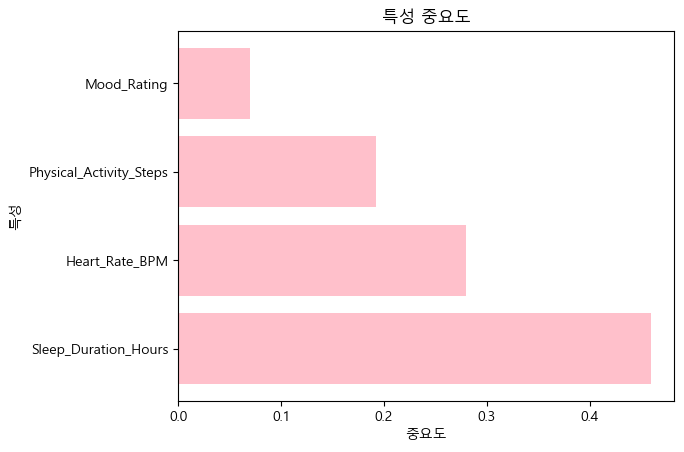

In [ ]:
# 8. 특성 중요도 시각화
feature_importances = pd.DataFrame({
    'Feature': selected_features, 
    'Importance': model.feature_importances_
    }).sort_values(by='Importance', ascending=False)

st.subheader('특성 중요도')
fig, ax = plt.subplots()
ax.barh(feature_importances['Feature'], feature_importances['Importance'], color='pink') # 가로 막대그래프
ax.set_xlabel('중요도')
ax.set_ylabel('특성', rotation=90)
ax.set_title('특성 중요도')
st.pyplot(fig)

In [13]:
# 9. 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.661


🔹 Confusion Matrix:
[[604 368]
 [310 718]]


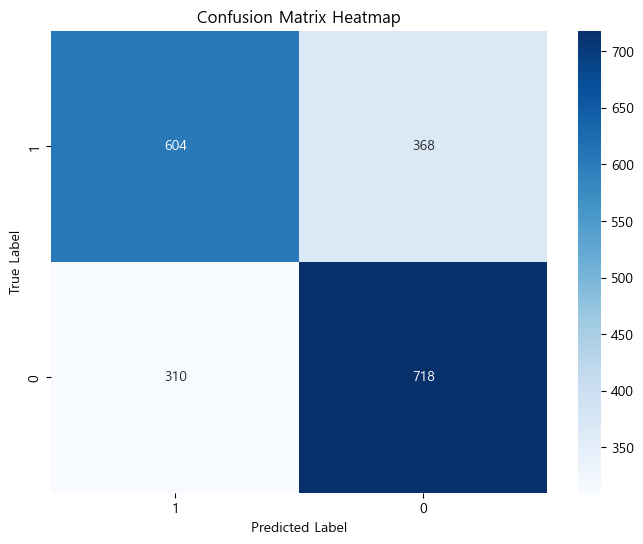

In [ ]:

# 10. 혼동 행렬 히트맵(Confusion Matrix) 시각화 - 모델의 예측 성능 확인
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# y의 고유한 클래스 라벨 가져오기
target_names = df['Mental_Health_Condition'].unique()

# 1️⃣ 혼동 행렬 생성
cm = confusion_matrix(y_test, y_pred)

# 2️⃣ 혼동 행렬 출력
print("🔹 Confusion Matrix:")
print(cm)

# 3️⃣ 히트맵 시각화
plt.figure(figsize=(8, 6)) # annot=True : 각 셀안의 숫자값을 표시, fmt="d" : 숫자값을 정수형태로 표시, cmap="Blues" : 색상값은 블루
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
# sns.heatmap(df.corr())
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# 4️⃣ 그래프 출력 (plt.show()가 가장 마지막에 있어야 함!)
plt.show()


🔹 Confusion Matrix:
[[604 368]
 [310 718]]


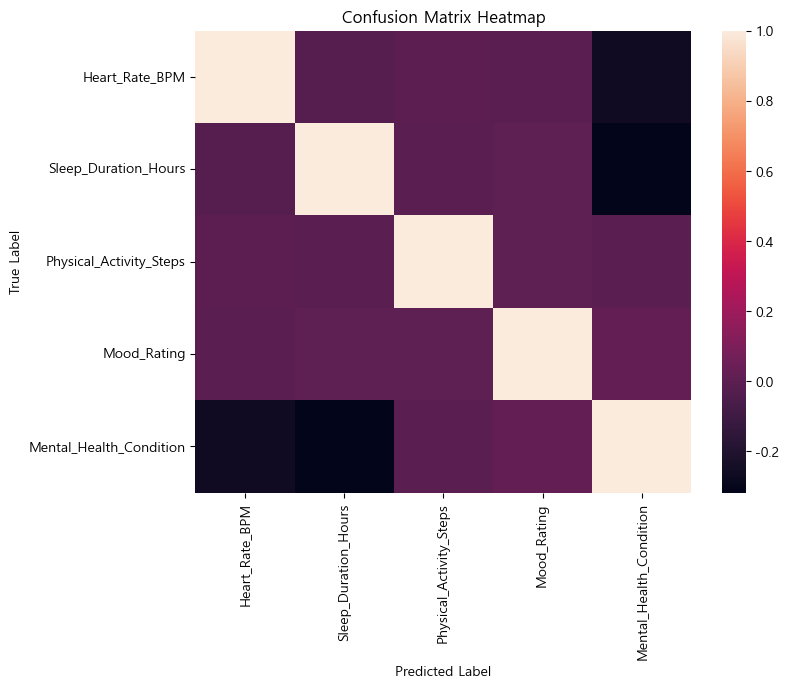

In [ ]:
# 11. 단순 상관관계 히트맵 시각화 - 데이터의 특성 간 관계 분석
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# y의 고유한 클래스 라벨 가져오기
target_names = df['Mental_Health_Condition'].unique()

# 1️⃣ 혼동 행렬 생성
cm = confusion_matrix(y_test, y_pred)

# 2️⃣ 혼동 행렬 출력
print("🔹 Confusion Matrix:")
print(cm)

# 3️⃣ 히트맵 시각화
plt.figure(figsize=(8, 6)) # annot=True : 각 셀안의 숫자값을 표시, fmt="d" : 숫자값을 정수형태로 표시, cmap="Blues" : 색상값은 블루
sns.heatmap(df.corr())
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.show()